In [1]:

# additional packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import join
import json
import sys
USER = os.getenv('USER')
sys.path.append(f'/home/{USER}/CODE/Pytorch-fingerprints/')


print('Packages loaded')

Packages loaded


In [2]:
def extract_virtual_epochs(models_path, plot_title='metrics'):
    'Plot virtual epochs metrics from model path'
    
    
    with open(os.path.join(models_path, "metrics/virtual_epochs.json"), "r") as read_file:
        metrics_dict = json.load(read_file)

    test_losses, test_precisions, test_recalls, test_F1Scores, test_tanimotos = [], [], [], [], []

    for _, metrics in metrics_dict.items():

        if metrics is None: 
            break

        test_losses.append(metrics["test_loss"])

        # metrics
        test_precisions.append(metrics["precision"])
        test_recalls.append(metrics["recall"])
        test_F1Scores.append(metrics["F1_score"])

        # tanimoto similarity
        test_tanimotos.append(metrics["tanimoto"])


    return test_losses, test_precisions, test_recalls, test_F1Scores, test_tanimotos
    

In [8]:
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/300k_1024_all_ks_dropout_0_5'

test_losses, test_precisions, test_recalls, test_F1Scores, test_tanimotos = extract_virtual_epochs(models_path)
train_losses = np.load(os.path.join(models_path, 'metrics/precision_epoch_test.npy'))

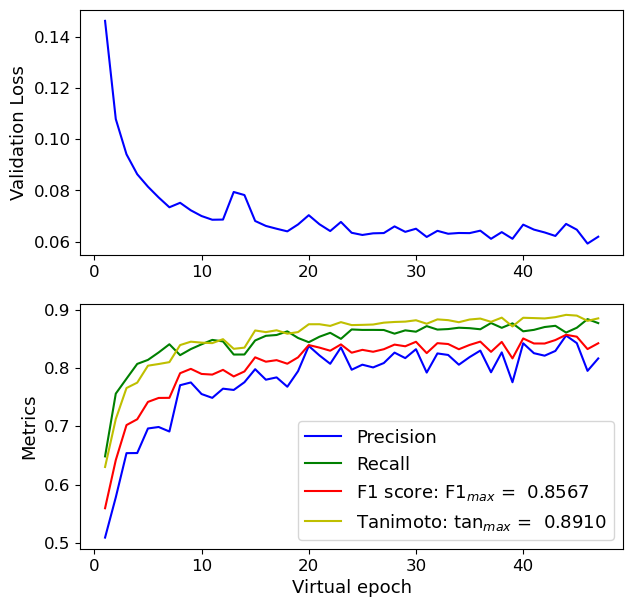

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes[0].plot(np.arange(len(test_losses))+1, test_losses, 'b-')
axes[0].set_ylabel('Validation Loss', fontsize = 13)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)


axes[1].plot(np.arange(len(test_losses))+1, test_precisions, 'b-')
axes[1].plot(np.arange(len(test_losses))+1, test_recalls, 'g-')
axes[1].plot(np.arange(len(test_losses))+1, test_F1Scores, 'r-')
axes[1].set_xlabel('Virtual epoch', fontsize = 13)
axes[1].set_ylabel('Metrics', fontsize = 13)

axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

axes[1].plot(np.arange(len(test_losses))+1, test_tanimotos, 'y-')
axes[1].legend(['Precision', 'Recall', f'F1 score: F1$_{{max}}$ =  {np.max(test_F1Scores):0.04f}',
                f'Tanimoto: tan$_{{max}}$ =  {np.max(test_tanimotos):0.04f}'], fontsize = 13)



plt.savefig('training_loss_300k_1024_all_ks_dropout_0_5.pdf', format="pdf", bbox_inches="tight")
plt.show()

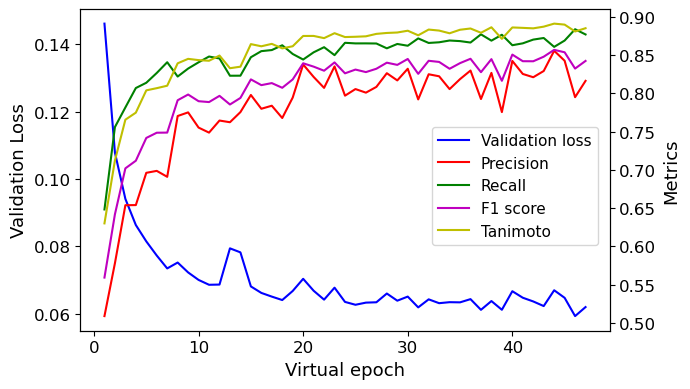

In [10]:
fig, ax = plt.subplots(figsize=(7, 4))

# Plot validation loss on the left y-axis
ax.plot(np.arange(len(test_losses))+1, test_losses, 'b-', label='Validation loss')
ax.set_ylabel('Validation Loss', fontsize=13)
ax.tick_params(axis='y')

# Create a twin Axes for metrics with a separate y-axis
ax_metrics = ax.twinx()

# Plot metrics on the right y-axis
ax_metrics.plot(np.arange(len(test_losses))+1, test_precisions, 'r-', label='Precision')
ax_metrics.plot(np.arange(len(test_losses))+1, test_recalls, 'g-', label='Recall')
ax_metrics.plot(np.arange(len(test_losses))+1, test_F1Scores, 'm-', label='F1 score')
ax_metrics.plot(np.arange(len(test_losses))+1, test_tanimotos, 'y-', label='Tanimoto')
ax_metrics.set_ylabel('Metrics', fontsize=13)

# Add validation loss to the legend
lines, labels = ax.get_legend_handles_labels()
lines_metrics, labels_metrics = ax_metrics.get_legend_handles_labels()
lines += lines_metrics
labels += labels_metrics
ax.legend(lines, labels, loc='upper right', fontsize=11)

# Set x-label and y-tick sizes
ax.set_xlabel('Virtual epoch', fontsize=13)
ax.tick_params(axis='both', which='both', labelsize=12)

# Increase y-ticks size for metrics
ax_metrics.tick_params(axis='y', labelsize=12)
ax.legend(lines, labels, loc='center left', bbox_to_anchor=(0.65, 0.45), fontsize=11)

# Tight layout
fig.tight_layout()
plt.savefig('training_loss_300k_1024_all_ks_dropout_0_5_one_plot.pdf', format="pdf", bbox_inches="tight")

# Show plot
plt.show()


In [11]:
def extract_virtual_epochs_regression(models_path):

    with open(os.path.join(models_path, "metrics/virtual_epochs.json"), "r") as read_file:
        metrics_dict = json.load(read_file)

    valid_loss, valid_accuracy, acc_C, acc_Br = [], [], [], []
    acc_Cl, acc_F, acc_I, acc_N, acc_O, acc_P, acc_S, acc_H = [], [], [], [], [], [], [], []

    for _, metrics in metrics_dict.items():

            if metrics is None: 
                break

            valid_loss.append(metrics["valid_loss"])

            # metrics
            valid_accuracy.append(metrics["valid_accuracy"])

            acc_C.append(metrics["acc_atom_dict"]["C"])
            acc_Br.append(metrics["acc_atom_dict"]["Br"])
            acc_Cl.append(metrics["acc_atom_dict"]["Cl"])
            acc_F.append(metrics["acc_atom_dict"]["F"])
            acc_I.append(metrics["acc_atom_dict"]["I"])
            acc_N.append(metrics["acc_atom_dict"]["N"])
            acc_O.append(metrics["acc_atom_dict"]["O"])
            acc_P.append(metrics["acc_atom_dict"]["P"])
            acc_S.append(metrics["acc_atom_dict"]["S"])
            acc_H.append(metrics["acc_atom_dict"]["H"])

    return valid_loss, valid_accuracy, acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N, acc_O, acc_P, acc_S, acc_H, metrics_dict

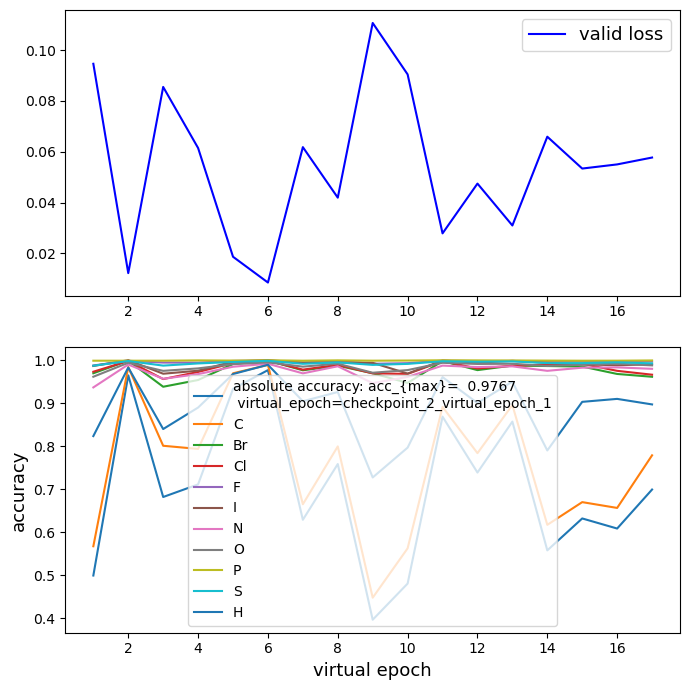

In [12]:
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/regression_w_H/'    
valid_loss, valid_accuracy, acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N, acc_O, acc_P, acc_S, acc_H, metrics_dict = extract_virtual_epochs_regression(models_path)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes[0].plot(np.arange(len(valid_loss))+1, valid_loss, 'b-')

axes[0].legend(['valid loss'], fontsize = 13)

axes[1].plot(np.arange(len(valid_loss))+1, valid_accuracy)
axes[1].plot(np.arange(len(valid_loss))+1, acc_C)
axes[1].plot(np.arange(len(valid_loss))+1, acc_Br)
axes[1].plot(np.arange(len(valid_loss))+1, acc_Cl)
axes[1].plot(np.arange(len(valid_loss))+1, acc_F)
axes[1].plot(np.arange(len(valid_loss))+1, acc_I)
axes[1].plot(np.arange(len(valid_loss))+1, acc_N)
axes[1].plot(np.arange(len(valid_loss))+1, acc_O)
axes[1].plot(np.arange(len(valid_loss))+1, acc_P)
axes[1].plot(np.arange(len(valid_loss))+1, acc_S)
axes[1].plot(np.arange(len(valid_loss))+1, acc_H)



path_list = list(metrics_dict.keys())
best_epoch = np.argmax(valid_accuracy)
best_epoch = path_list[best_epoch].split('/')[-1].split('.')[0]

axes[1].set_xlabel('virtual epoch', fontsize = 13)
axes[1].set_ylabel('accuracy', fontsize = 13)
axes[1].legend([f'absolute accuracy: acc_{{max}}=  {np.max(valid_accuracy):0.04f} \n virtual_epoch={best_epoch}', 
                'C', 'Br', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'H'])


fig.tight_layout()

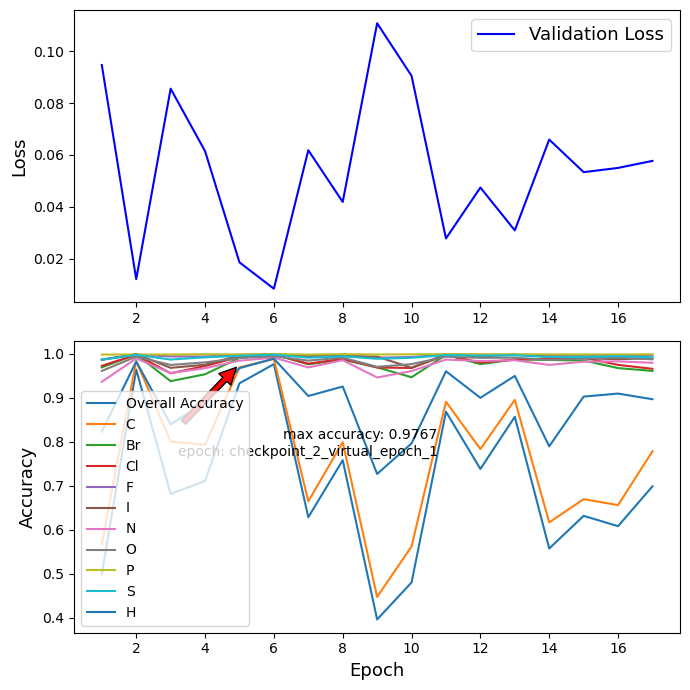

In [13]:


# models_path definition
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/regression_w_H/'    

# Extract metrics
(
    valid_loss, valid_accuracy,
    acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N,
    acc_O, acc_P, acc_S, acc_H, metrics_dict
) = extract_virtual_epochs_regression(models_path)



# Prepare plot data
elements = ['C', 'Br', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'H']
accuracy_per_element = [acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N, acc_O, acc_P, acc_S, acc_H]
epochs = np.arange(len(valid_loss)) + 1

# Define Figure and Axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

# Plot validation loss
ax1.plot(epochs, valid_loss, 'b-', label='Validation Loss')
ax1.legend(fontsize=13)
ax1.set_ylabel('Loss', fontsize=13)

# Plot validation accuracy
ax2.plot(epochs, valid_accuracy, label='Overall Accuracy')

# Plot per-element accuracy
for element, accuracy in zip(elements, accuracy_per_element):
    ax2.plot(epochs, accuracy, label=element)

# Mark best epoch
best_epoch_index = np.argmax(valid_accuracy)
best_epoch = list(metrics_dict.keys())[best_epoch_index].split('/')[-1].split('.')[0]

ax2.annotate(
    f'max accuracy: {np.max(valid_accuracy):.04f}\nepoch: {best_epoch}',
    xy=(best_epoch_index, np.max(valid_accuracy)), xycoords='data',
    xytext=(0.6, 0.7), textcoords='axes fraction',
    arrowprops=dict(facecolor='red', shrink=0.05),
    horizontalalignment='right', verticalalignment='top',
)

# Set labels
ax2.set_xlabel('Epoch', fontsize=13)
ax2.set_ylabel('Accuracy', fontsize=13)
ax2.legend()

# Tight layout
fig.tight_layout()

# Show plot
plt.show()


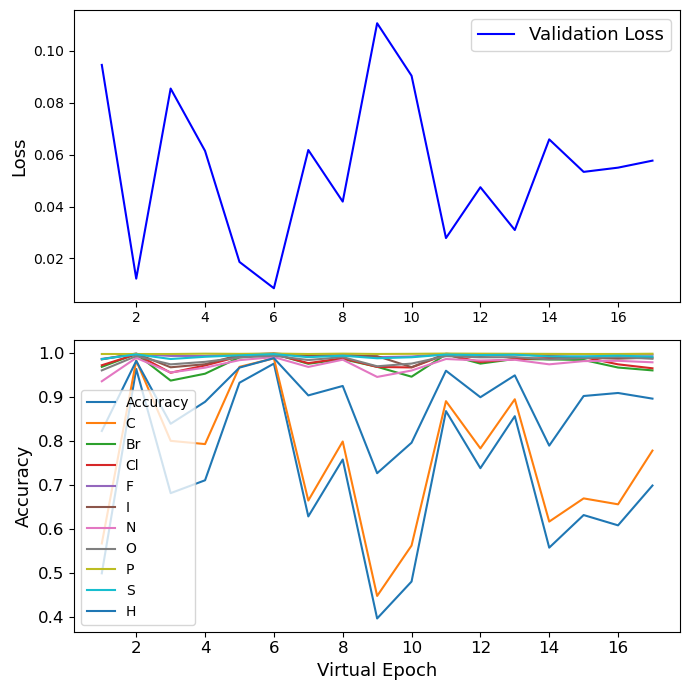

In [42]:

# models_path definition
models_path = '/home/manuel/CODE/Pytorch-fingerprints/experiments/regression_w_H/'    
plt.rcParams.update(plt.rcParamsDefault)

# Extract metrics
(
    valid_loss, valid_accuracy,
    acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N,
    acc_O, acc_P, acc_S, acc_H, metrics_dict
) = extract_virtual_epochs_regression(models_path)

# Prepare plot data
elements = ['C', 'Br', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'H']
accuracy_per_element = [acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N, acc_O, acc_P, acc_S, acc_H]
epochs = np.arange(len(valid_loss)) + 1

# Define Figure and Axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

# Plot validation loss
ax1.plot(epochs, valid_loss, 'b-', label='Validation Loss')
ax1.legend(fontsize=13)
ax1.set_ylabel('Loss', fontsize=13)

# Plot validation accuracy
ax2.plot(epochs, valid_accuracy, label='Accuracy')

# Plot per-element accuracy
for element, accuracy in zip(elements, accuracy_per_element):
    ax2.plot(epochs, accuracy, label=element)

# Set labels and tick sizes
ax2.set_xlabel('Virtual Epoch', fontsize=13)
ax2.set_ylabel('Accuracy', fontsize=13)
ax2.legend()
ax2.tick_params(axis='both', which='both', labelsize=12)

# Increase xticks and yticks size
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# Tight layout
fig.tight_layout()

# Show plot
plt.show()


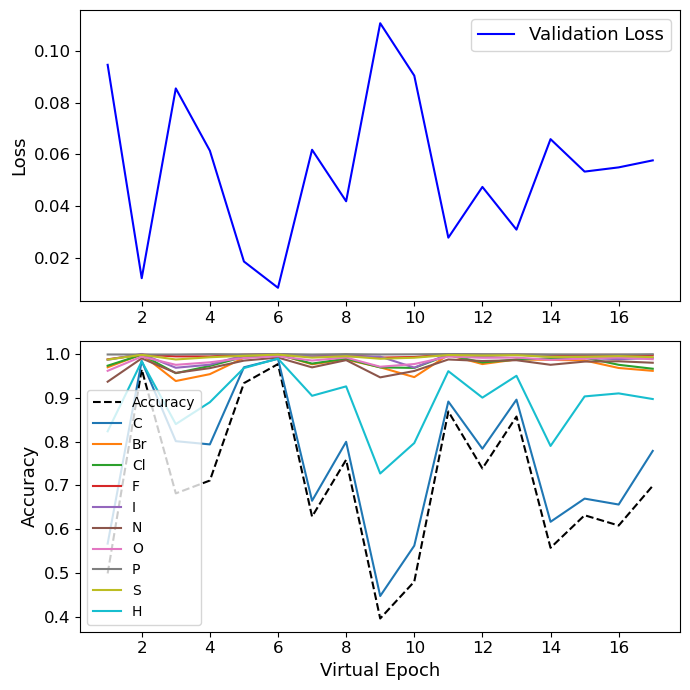

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset Matplotlib style to default
plt.rcParams.update(plt.rcParamsDefault)

# models_path definition
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/regression_w_H/'    

# Extract metrics
(
    valid_loss, valid_accuracy,
    acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N,
    acc_O, acc_P, acc_S, acc_H, metrics_dict
) = extract_virtual_epochs_regression(models_path)

# Prepare plot data
elements = ['C', 'Br', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'H']
accuracy_per_element = [acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N, acc_O, acc_P, acc_S, acc_H]
epochs = np.arange(len(valid_loss)) + 1

# Define Figure and Axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

# Set color palette for atom lines
atom_colors = sns.color_palette('tab10')

# Plot validation loss
ax1.plot(epochs, valid_loss, 'b-', label='Validation Loss')
ax1.legend(fontsize=13)
ax1.set_ylabel('Loss', fontsize=13)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
# Plot validation accuracy with dashed lines
ax2.plot(epochs, valid_accuracy, 'k--', label='Accuracy')

# Plot per-element accuracy with distinct colors
for i, (element, accuracy) in enumerate(zip(elements, accuracy_per_element)):
    ax2.plot(epochs, accuracy, color=atom_colors[i], label=element)

# Set labels and tick sizes
ax2.set_xlabel('Virtual Epoch', fontsize=13)
ax2.set_ylabel('Accuracy', fontsize=13)
ax2.legend()
ax2.tick_params(axis='both', which='both', labelsize=12)

# Increase xticks and yticks size
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# Tight layout
fig.tight_layout()

plt.savefig('training_loss_regresion_w_H.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [49]:
metrics_dict

{'/home/mgonzalez/CODE/Pytorch-fingerprints/experiments/regression_w_H/models/checkpoint_1_virtual_epoch_1.pth': {'valid_loss': 0.09462226577103137,
  'valid_accuracy': 0.49917104840278625,
  'acc_atom_dict': {'C': 0.5672116279602051,
   'Br': 0.9693223834037781,
   'Cl': 0.9729224443435669,
   'F': 0.9874669313430786,
   'I': 0.9863219261169434,
   'N': 0.9364500045776367,
   'O': 0.9612616896629333,
   'P': 0.9985334277153015,
   'S': 0.986860990524292,
   'H': 0.8233133554458618}},
 '/home/mgonzalez/CODE/Pytorch-fingerprints/experiments/regression_w_H/models/checkpoint_1_virtual_epoch_2.pth': {'valid_loss': 0.012225327516595523,
  'valid_accuracy': 0.9645276069641113,
  'acc_atom_dict': {'C': 0.9836673140525818,
   'Br': 0.9986667037010193,
   'Cl': 0.997933566570282,
   'F': 0.9983334541320801,
   'I': 0.9996666312217712,
   'N': 0.9896610379219055,
   'O': 0.9937277436256409,
   'P': 0.998533308506012,
   'S': 0.997733473777771,
   'H': 0.9827335476875305}},
 '/home/mgonzalez/CODE

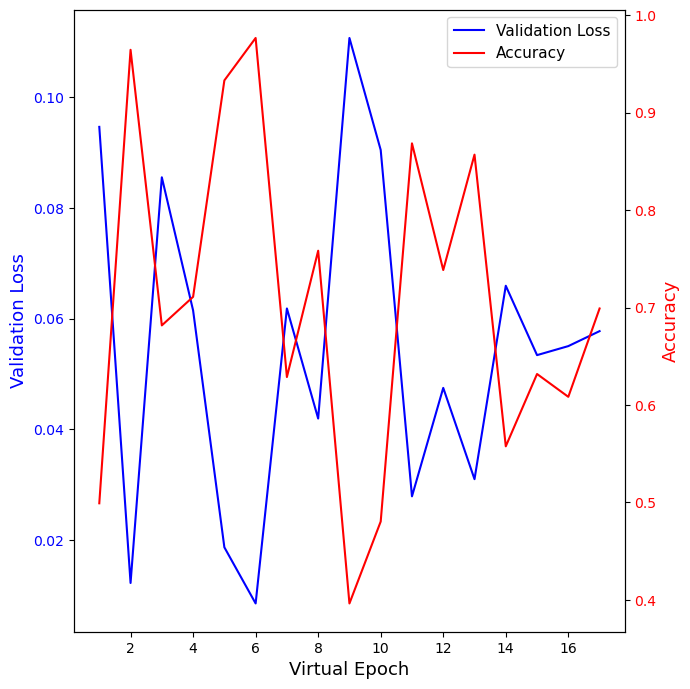

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset Matplotlib style to default
plt.rcParams.update(plt.rcParamsDefault)

# models_path definition
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/regression_w_H/'    

# Extract metrics
(
    valid_loss, valid_accuracy,
    acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N,
    acc_O, acc_P, acc_S, acc_H, metrics_dict
) = extract_virtual_epochs_regression(models_path)

# Prepare plot data
epochs = np.arange(len(valid_loss)) + 1

# Define Figure and Axes
fig, ax = plt.subplots(figsize=(7, 7))

# Plot validation loss on the left y-axis
ax.plot(epochs, valid_loss, 'b-', label='Validation Loss')
ax.set_xlabel('Virtual Epoch', fontsize=13)
ax.set_ylabel('Validation Loss', color='b', fontsize=13)
ax.tick_params(axis='y', labelcolor='b')

# Create a twin Axes for accuracy with a separate y-axis
ax_acc = ax.twinx()

# Plot accuracy on the right y-axis
ax_acc.plot(epochs, valid_accuracy, 'r-', label='Accuracy')
ax_acc.set_ylabel('Accuracy', color='r', fontsize=13)
ax_acc.tick_params(axis='y', labelcolor='r')

# Set legend
lines = ax.get_lines() + ax_acc.get_lines()
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper right', fontsize=11)

# Tight layout
fig.tight_layout()

# Show plot
plt.show()


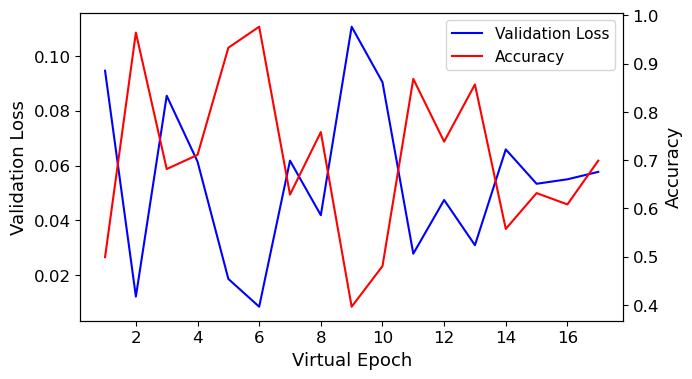

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset Matplotlib style to default
plt.rcParams.update(plt.rcParamsDefault)

# models_path definition
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/regression_w_H/'    

# Extract metrics
(
    valid_loss, valid_accuracy,
    acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N,
    acc_O, acc_P, acc_S, acc_H, metrics_dict
) = extract_virtual_epochs_regression(models_path)

# Prepare plot data
epochs = np.arange(len(valid_loss)) + 1

# Define Figure and Axes
fig, ax = plt.subplots(figsize=(7, 4))

# Plot validation loss on the left y-axis
ax.plot(epochs, valid_loss, 'b-', label='Validation Loss')
ax.set_xlabel('Virtual Epoch', fontsize=13)
ax.set_ylabel('Validation Loss', color='black', fontsize=13)
ax.tick_params(axis='y', labelcolor='black')

# Create a twin Axes for accuracy with a separate y-axis
ax_acc = ax.twinx()

# Plot accuracy on the right y-axis
ax_acc.plot(epochs, valid_accuracy, 'r-', label='Accuracy')
ax_acc.set_ylabel('Accuracy', color='black', fontsize=13)
ax_acc.tick_params(axis='y', labelcolor='black', labelsize=12)

# Set legend
lines = ax.get_lines() + ax_acc.get_lines()
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper right', fontsize=11)

# Set fontsize for xticks
ax.tick_params(axis='both', which='both', labelsize=12)

# Tight layout
#plt.savefig('training_loss_regression_w_H_one_plot.pdf', format="pdf", bbox_inches="tight")

# Show plot
plt.show()


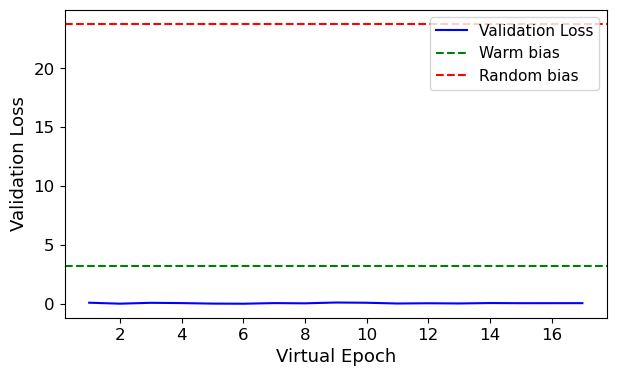

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Reset Matplotlib style to default
plt.rcParams.update(plt.rcParamsDefault)

# models_path definition
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/regression_w_H/'

# Extract metrics
(
    valid_loss, _, _, _, _, _, _, _, _, _, _, _, _
) = extract_virtual_epochs_regression(models_path)

# Prepare plot data
epochs = np.arange(len(valid_loss)) + 1

# Define Figure and Axes
fig, ax = plt.subplots(figsize=(7, 4))

# Plot validation loss
ax.plot(epochs, valid_loss, 'b-', label='Validation Loss')
ax.set_xlabel('Virtual Epoch', fontsize=13)
ax.set_ylabel('Validation Loss', color='black', fontsize=13)
ax.tick_params(axis='y', labelcolor='black')

# Add horizontal lines at specified y values with colors green and red
y_values = [3.1712475050791746, 23.78183318836597]  # replace with your desired y values
ax.axhline(y_values[0], color='green', linestyle='--', label='Warm bias')
ax.axhline(y_values[1], color='red', linestyle='--', label='Random bias')

# Set legend
ax.legend(loc='upper right', fontsize=11)

# Set fontsize for xticks
ax.tick_params(axis='both', which='both', labelsize=12)
#ax.set_yscale('log')
# Tight layout
# plt.savefig('training_loss_regression_w_H_one_plot.pdf', format="pdf", bbox_inches="tight")

# Show plot
plt.show()

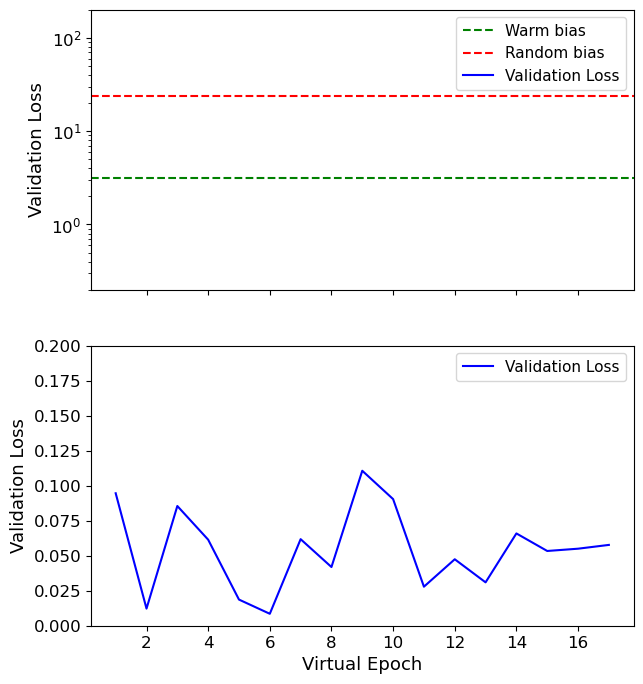

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Reset Matplotlib style to default
plt.rcParams.update(plt.rcParamsDefault)

# models_path definition
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/regression_w_H/'

# Extract metrics
(
    valid_loss, _, _, _, _, _, _, _, _, _, _, _, _
) = extract_virtual_epochs_regression(models_path)
valid_loss = np.array(valid_loss)
# Prepare plot data
epochs = np.arange(len(valid_loss)) + 1

# Separate your data into two parts
threshold = 0.2
mask = valid_loss <= threshold
epochs_linear, valid_loss_linear = epochs[mask], valid_loss[mask]
epochs_log, valid_loss_log = epochs[~mask], valid_loss[~mask]

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(7, 8))

# Plot the linear part
ax2.plot(epochs_linear, valid_loss_linear, 'b-', label='Validation Loss')
ax2.set_ylabel('Validation Loss', color='black', fontsize=13)
ax2.tick_params(axis='y', labelcolor='black')

ax2.legend(loc='upper right', fontsize=11)
ax2.tick_params(axis='both', which='both', labelsize=12)
ax2.set_ylim([0, 0.2])
# Plot the logarithmic part

ax2.set_xlabel('Virtual Epoch', fontsize=13)
ax1.set_ylabel('Validation Loss', color='black', fontsize=13)
ax1.tick_params(axis='y', labelcolor='black')

ax1.set_yscale('log')
ax1.axhline(3.1712475050791746, color='green', linestyle='--', label='Warm bias')  # Only if within range
ax1.axhline(23.78183318836597, color='red', linestyle='--', label='Random bias')  # Only if within range
ax1.plot(epochs_linear, valid_loss_linear, 'b-', label='Validation Loss')
ax1.legend(loc='upper right', fontsize=11)
ax1.tick_params(axis='both', which='both', labelsize=12)
ax1.set_ylim([0.2, 200])
# Tight layout
plt.savefig('training_loss_regression_w_H_w_bias.pdf', format="pdf", bbox_inches="tight")
# Show plot
plt.show()


In [24]:
ax2.get_yticklabels()

[Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
 Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
 Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
 Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
 Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
 Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
 Text(0, 10000.0, '$\\mathdefault{10^{4}}$')]

### Joint figure

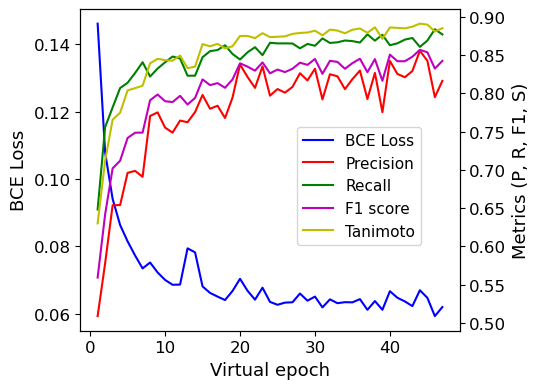

In [30]:
fig, ax = plt.subplots(figsize=(5.5, 4))

# Plot validation loss on the left y-axis
ax.plot(np.arange(len(test_losses))+1, test_losses, 'b-', label='BCE Loss')
ax.set_ylabel('BCE Loss', fontsize=13)
ax.tick_params(axis='y')

# Create a twin Axes for metrics with a separate y-axis
ax_metrics = ax.twinx()

# Plot metrics on the right y-axis
ax_metrics.plot(np.arange(len(test_losses))+1, test_precisions, 'r-', label='Precision')
ax_metrics.plot(np.arange(len(test_losses))+1, test_recalls, 'g-', label='Recall')
ax_metrics.plot(np.arange(len(test_losses))+1, test_F1Scores, 'm-', label='F1 score')
ax_metrics.plot(np.arange(len(test_losses))+1, test_tanimotos, 'y-', label='Tanimoto')
ax_metrics.set_ylabel('Metrics (P, R, F1, S)', fontsize=13)

# Add validation loss to the legend
lines, labels = ax.get_legend_handles_labels()
lines_metrics, labels_metrics = ax_metrics.get_legend_handles_labels()
lines += lines_metrics
labels += labels_metrics
ax.legend(lines, labels, loc='upper right', fontsize=11)

# Set x-label and y-tick sizes
ax.set_xlabel('Virtual epoch', fontsize=13)
ax.tick_params(axis='both', which='both', labelsize=12)

# Increase y-ticks size for metrics
ax_metrics.tick_params(axis='y', labelsize=12)
ax.legend(lines, labels, loc='center left', bbox_to_anchor=(0.55, 0.45), fontsize=11)

# Tight layout
fig.tight_layout()
plt.savefig('training_loss_300k_1024_all_ks_dropout_0_5_one_plot_v2.pdf', format="pdf", bbox_inches="tight")

# Show plot
plt.show()


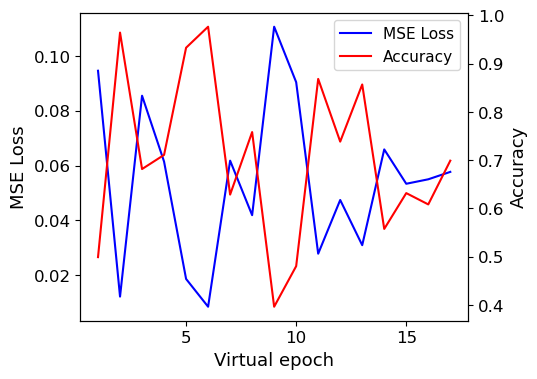

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns



# models_path definition
models_path = f'/home/{USER}/CODE/Pytorch-fingerprints/experiments/regression_w_H/'    

# Extract metrics
(
    valid_loss, valid_accuracy,
    acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N,
    acc_O, acc_P, acc_S, acc_H, metrics_dict
) = extract_virtual_epochs_regression(models_path)

# Prepare plot data
epochs = np.arange(len(valid_loss)) + 1

# Define Figure and Axes
fig, ax = plt.subplots(figsize=(5, 4))

# Plot validation loss on the left y-axis
ax.plot(epochs, valid_loss, 'b-', label='MSE Loss')
ax.set_xlabel('Virtual epoch', fontsize=13)
ax.set_ylabel('MSE Loss', color='black', fontsize=13)
ax.tick_params(axis='y', labelcolor='black')

# Create a twin Axes for accuracy with a separate y-axis
ax_acc = ax.twinx()

# Plot accuracy on the right y-axis
ax_acc.plot(epochs, valid_accuracy, 'r-', label='Accuracy')
ax_acc.set_ylabel('Accuracy', color='black', fontsize=13)
ax_acc.tick_params(axis='y', labelcolor='black', labelsize=12)

# Set legend
lines = ax.get_lines() + ax_acc.get_lines()
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper right', fontsize=11)

# Set fontsize for xticks
ax.tick_params(axis='both', which='both', labelsize=12)

# Tight layout
plt.savefig('training_loss_regression_w_H_one_plot_v2.pdf', format="pdf", bbox_inches="tight")

# Show plot
plt.show()
